In [1]:
#DEEP TIS 
#PREDICTING TRANSLATION INITIATION SITES FROM GENOMIC SEQUENCES



In [2]:
import pandas as pd
import numpy as np
import itertools


In [3]:
data1 = pd.read_csv("mmc1.csv")

In [4]:
data1.head()

,Sequence,Label
0,GATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGGGAA...,True
1,GTCACTGCCCTCGCGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True
2,GTCACTGTCCTCGGGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True
3,GCGGAAAACGGCAGGAGGAGAGCCAATCCCGAGGGTCGGCGGACGC...,True
4,TCGGCGGTGGAACCGCCAGTCCGGGGTCACAGAGCTTGAGAAGCGA...,True


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sequence  2318 non-null   object
 1   Label     2318 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 20.5+ KB


In [6]:
# check len of sequence in each row

def len_seq(sequence):
    return len(sequence)
data1['len'] = data1['Sequence'].apply(len_seq)

# remove gaps from sequence

def remove_gaps(sequence):
    return sequence.replace(' ','N')
data1['Sequence'] = data1['Sequence'].apply(remove_gaps)

In [7]:
data1.head()

,Sequence,Label,len
0,GATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGGGAA...,True,399
1,GTCACTGCCCTCGCGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399
2,GTCACTGTCCTCGGGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399
3,GCGGAAAACGGCAGGAGGAGAGCCAATCCCGAGGGTCGGCGGACGC...,True,399
4,TCGGCGGTGGAACCGCCAGTCCGGGGTCACAGAGCTTGAGAAGCGA...,True,399


In [8]:
# see unique values in len column
data1['len'].unique()

array([399])

In [9]:
# check if there are null values in the dataset
data1.isnull().sum()


Sequence    0
Label       0
len         0
dtype: int64

In [10]:
# removing null values
data1.dropna(inplace=True)

In [11]:
# remove duplicates from the dataset
data1["Sequence"].drop_duplicates(inplace=True)

In [12]:
# remove the sequence if there are any other nucleotides other than A,T,C,G

def check_seq(sequence):
    for i in sequence:
        if i not in ['A','T','C','G']:
            return False
    return True

# data1["h"] = data1['Sequence'].apply(check_seq)

# remove the sequence if there are any other nucleotides other than A,T,C,G
data1 = data1[data1['Sequence'].apply(check_seq)]
# data1[data1['h']==False]
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 0 to 2317
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sequence  2318 non-null   object
 1   Label     2318 non-null   bool  
 2   len       2318 non-null   int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 56.6+ KB


In [13]:
# C2 encoding of sequence
def C2_encoding(sequence):
    encoding = []
    for i in sequence:
        if i == 'A':
            encoding.append([0,0])
        elif i == 'C':
            encoding.append([0,1])
        elif i == 'G':
            encoding.append([1,0])
        elif i == 'T':
            encoding.append([1,1])
    return encoding


In [14]:
data1['C2_encoding'] = data1['Sequence'].apply(C2_encoding)

In [15]:
data1.head()

,Sequence,Label,len,C2_encoding
0,GATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGGGAA...,True,399,"[[1, 0], [0, 0], [1, 1], [0, 1], [0, 1], [0, 1..."
1,GTCACTGCCCTCGCGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399,"[[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1..."
2,GTCACTGTCCTCGGGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399,"[[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1..."
3,GCGGAAAACGGCAGGAGGAGAGCCAATCCCGAGGGTCGGCGGACGC...,True,399,"[[1, 0], [0, 1], [1, 0], [1, 0], [0, 0], [0, 0..."
4,TCGGCGGTGGAACCGCCAGTCCGGGGTCACAGAGCTTGAGAAGCGA...,True,399,"[[1, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0..."


In [16]:
data1["Label"].value_counts()


True     1159
False    1159
Name: Label, dtype: int64

In [17]:
# gapped kmer in the sequence
import itertools
def gapped_kmer(sequence, k=6, g=2):
    encoding = []
    freq_dict = {}
    for i in range(len(sequence) - k + 1):
        encoding.append(sequence[i:i+k])
    return encoding, freq_dict

def get_kmer_frequencies(seq,k):
    freq_dict = {}
    l=['A','T','C','G']
    repetitions = k
    combinations = list(itertools.product(l, repeat=repetitions))
    for i in combinations:
        se=''.join(list(i))
        fo=seq.count(se)
        freq_dict[se]=fo
    total_kmers = len(seq) - k + 1
    for kmer in freq_dict:
        freq_dict[kmer] /= total_kmers
    return freq_dict

    
                


data1['gapped_kmer'] = data1['Sequence'].apply(gapped_kmer)
data1["kmer_frequencies_tri"] = data1["Sequence"].apply(get_kmer_frequencies, k=3)
data1["kmer_frequencies_di"] = data1["Sequence"].apply(get_kmer_frequencies, k=2)
data1["C2_encoding"]

0       [[1, 0], [0, 0], [1, 1], [0, 1], [0, 1], [0, 1...
1       [[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1...
2       [[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1...
3       [[1, 0], [0, 1], [1, 0], [1, 0], [0, 0], [0, 0...
4       [[1, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0...
                              ...                        
2313    [[0, 0], [1, 0], [1, 0], [0, 0], [1, 0], [0, 0...
2314    [[1, 0], [1, 1], [1, 0], [1, 0], [0, 0], [0, 0...
2315    [[0, 0], [0, 1], [0, 0], [1, 0], [0, 0], [0, 0...
2316    [[0, 0], [0, 0], [1, 1], [0, 1], [1, 1], [1, 0...
2317    [[0, 0], [0, 1], [1, 1], [0, 1], [1, 1], [1, 1...
Name: C2_encoding, Length: 2318, dtype: object

In [18]:
def atg_freq(sequence):
    total_atg = sequence.count('ATG')
    
        
    return total_atg
def atg_features(sequence):
    inframe_atg = 0
    for i in range(len(sequence)):
        if i % 3 == 0 and sequence[i:i+3] == 'ATG': 
            inframe_atg += 1
    return inframe_atg


data1['atg_freq'] = data1['Sequence'].apply(atg_freq)
data1["atg_features"]=data1['Sequence'].apply(atg_features)

In [19]:

# split kmer_frequencies keys as columns
data1 = pd.concat([data1, data1['kmer_frequencies_di'].apply(pd.Series)], axis=1)
data1 = pd.concat([data1, data1['kmer_frequencies_tri'].apply(pd.Series)], axis=1)
data1.drop('kmer_frequencies_tri', axis=1, inplace=True)
data1.drop('kmer_frequencies_di', axis=1, inplace=True)
# replace nan  with 0
data1.fillna(0, inplace=True)
data1.head()


,Sequence,Label,len,C2_encoding,gapped_kmer,atg_freq,atg_features,AA,AT,AC,...,GTC,GTG,GCA,GCT,GCC,GCG,GGA,GGT,GGC,GGG
0,GATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGGGAA...,True,399,"[[1, 0], [0, 0], [1, 1], [0, 1], [0, 1], [0, 1...","([GATCCC, ATCCCT, TCCCTG, CCCTGC, CCTGCG, CTGC...",2,1,0.022613,0.025126,0.025126,...,0.017632,0.022670,0.010076,0.027708,0.022670,0.027708,0.027708,0.035264,0.020151,0.052897
1,GTCACTGCCCTCGCGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399,"[[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1...","([GTCACT, TCACTG, CACTGC, ACTGCC, CTGCCC, TGCC...",2,1,0.027638,0.010050,0.030151,...,0.017632,0.022670,0.015113,0.015113,0.052897,0.062972,0.022670,0.020151,0.060453,0.030227
2,GTCACTGTCCTCGGGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True,399,"[[1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1...","([GTCACT, TCACTG, CACTGT, ACTGTC, CTGTCC, TGTC...",2,1,0.027638,0.012563,0.032663,...,0.015113,0.025189,0.015113,0.017632,0.045340,0.068010,0.022670,0.020151,0.062972,0.035264
3,GCGGAAAACGGCAGGAGGAGAGCCAATCCCGAGGGTCGGCGGACGC...,True,399,"[[1, 0], [0, 1], [1, 0], [1, 0], [0, 0], [0, 0...","([GCGGAA, CGGAAA, GGAAAA, GAAAAC, AAAACG, AAAC...",1,1,0.025126,0.010050,0.037688,...,0.020151,0.020151,0.015113,0.010076,0.040302,0.078086,0.030227,0.035264,0.080605,0.045340
4,TCGGCGGTGGAACCGCCAGTCCGGGGTCACAGAGCTTGAGAAGCGA...,True,399,"[[1, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0...","([TCGGCG, CGGCGG, GGCGGT, GCGGTG, CGGTGG, GGTG...",1,1,0.015075,0.012563,0.035176,...,0.017632,0.010076,0.012594,0.017632,0.068010,0.025189,0.015113,0.012594,0.017632,0.015113


In [20]:
# check the len of gapped_kmer
data1['gapped_kmer'].apply(len).unique()
# label encoding of the label column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Label'] = le.fit_transform(data1['Label'])
data1.head()
data1.shape


(2318, 87)

In [21]:
data1['Label'].value_counts()

1    1159
0    1159
Name: Label, dtype: int64

In [22]:
# pca on di kmer and tri kmer 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=20)
scaler = StandardScaler()
data1.iloc[:, 5:] = scaler.fit_transform(data1.iloc[:, 5:])
features = pca.fit_transform(data1.iloc[:, 5:])

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 0 to 2317
Data columns (total 87 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sequence      2318 non-null   object 
 1   Label         2318 non-null   int64  
 2   len           2318 non-null   int64  
 3   C2_encoding   2318 non-null   object 
 4   gapped_kmer   2318 non-null   object 
 5   atg_freq      2318 non-null   float64
 6   atg_features  2318 non-null   float64
 7   AA            2318 non-null   float64
 8   AT            2318 non-null   float64
 9   AC            2318 non-null   float64
 10  AG            2318 non-null   float64
 11  TA            2318 non-null   float64
 12  TT            2318 non-null   float64
 13  TC            2318 non-null   float64
 14  TG            2318 non-null   float64
 15  CA            2318 non-null   float64
 16  CT            2318 non-null   float64
 17  CC            2318 non-null   float64
 18  CG            2318 non-null 

In [23]:
features

array([[ 8.04896459, -0.2641255 , -3.87244628, ..., -1.52411624,
        -1.2274092 ,  0.37778181],
       [10.13144179,  0.09454052,  0.73835181, ...,  0.21358044,
         0.43814929, -1.00237876],
       [ 9.81191092, -0.33375663,  1.31085388, ...,  0.1639112 ,
         0.98373789, -0.30890143],
       ...,
       [-5.39280107, -3.98038722, -1.52085195, ..., -0.51013481,
        -0.25479981,  0.44754379],
       [-4.3077427 , -5.08535294, -1.70341944, ...,  0.11249996,
        -0.38882822,  0.38075344],
       [-4.17209458, -5.34778033, -1.91432365, ...,  0.1892315 ,
        -0.48250368,  0.23703247]])

In [24]:
import csv

with open('mmc1.csv', 'r') as file:
    reader = csv.DictReader(file)
    h=[]
    for row in reader:
        if row['Label'] == 'True':
            h.append(1)
        else:
            h.append(0)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features, h, test_size=0.3)
print(y_test)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)





[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 

array([[332,  10],
       [  3, 351]])

In [26]:
def predicting(a):
    l=[]
    l.append(atg_freq(a))
    l.append(atg_features(a))
    f2=list(get_kmer_frequencies(a,k=2).values())
    f3=list(get_kmer_frequencies(a,k=3).values())
    final=l+f2+f3
    final=np.array(final)
    # my_dataframe=data1.iloc[:, 6:]
    # new_dataframe = pd.DataFrame([final], columns=my_dataframe.columns)
    # my_dataframe= pd.concat([my_dataframe, new_dataframe], ignore_index=True)
    # print(my_dataframe.head())
    
    # pca = PCA(n_components=20)
    last= pca.transform([final])
    return last[-1]

a="AAACAACGTTGCAATGGAATAACTTTGTACATGTCATTTCTCCTGTGTAAAAGGTGTCTATTGGGGAAATTGCTAGAAGTGGCTTTGCTGAGTCTGAGGGTCTGTGCATTTGTGATTTGATCAACATCGTCAAATTATACTGCCACCAGCAATGTATGAAAGTGCTTGTTTTCCCGTAGCTTGGTCAATGAACTATTAGACCTGAGATCTTTAGCCATCCAATATGTGAAAAACTGTAACTTTAGTTTGCATTTGTTTATTGTATGTGAAGTTGAGCATCCTTTCAGAAGTTTAAGGCCTACTCTGTCCTGTCTGGGTCAGAGTATGCCCTTTTATTTTATTTTTAGTTTTAGTTTTTGAGACAGAGTCTCGCTCTGTCACCCAGGCTGGAGTACGGTGGCGCAATCTCGGCTCACTGTAACCTCTGCCTCCCGGGTTCAAGCGATTCTTCTGCCTCAGCCTCCTGAGTAGCTGGGATTACAGGAGCACGCCACCACGCCCGGCTAATTTTTTTTGTATTTTCAATAGAGACGGGGGTTTCACCATGTTGGTCAGGCTGGTCTCGAACTCCTGACCTGATGATCCGCCCGCCTCAGCCTCCCAAAGCGCTGGGATTACAGGCGTGAGCCACCGTGCCCGGCCCTCAGAGTATGCCCTTTTAAAAATCTGTGGGTACACGTAGCCAACTGACATTTTAAGACAAGAGGACCCACAGACCCTCTTTCCACAACGCAGCCCGGGACCTGTCTGTCTGCATCAATAGTGCCTGGCTTTCGGAGCTAGAAAACAGCACCTGCGCGTGGTCGAAGCCTGAACCTCTACTTACAGGTGCGGAGCTTCCGGCTTGCCAGGGGAAGGAGCCCGCCCCTCCCGGCTGCGTGCACCAGCGCAGCTAGTCACGTGACGCCGGGGGCGGGGGCAGATAGGAGGTGCCTGCTGTCATCGTTCCGTGGGCCCTGCTGCGGGCACGCTCTCGGCGCATGCGTTTTTTATGCGGGATTAAGCTTGCTGCTGCGTGACAGCGGAGGGCTAGGAAAAGGCGCAGTGGGGCCCGGAGCTGTCACCCCTGACTCGACGCAGCTTCCGTTCTCCTGGTGACGTGGCCTACAGGAACCGCCCCAGTGGTCAGCTGCCGCGCTGTTGCTAGGCAACAGCGTGCGAGCTCAGATCAGCGTGGGGTGGAGGAGAAGTGGAGTTTGGAAGTTCAGGGGCACAGGGGCACAGGCCCACGACTGCAGCGGGATGGACCAGTACTGCATCCTGGGCCGCATCGGGGAGGGCGCCCACGGCATCGTCTTCAAGGCCAAGCACGTGGAGGTGAGGCTGGACCGCGGCCGGCAGCCTGGCGGGGGTGTGCCCCCGCCACCCTCCGGCTAACGCTCTAAACTGTTTCGGTTCCCTTTTTACATCCAGTACAGTTTTTAAAACCTACTCATATTCTAAACCTACTTTGGGCCGTTGCGCTTCCCTCCGCACAGCTGGCTTGGTCCCCTACCCCAGCGGCTGGGTCCCAGGCTAGTCCTAGACCCCCGAGGAGGGCCTCTGGCCGAGCCGGGGGCGCGTGTCTCTCTCTCAACCACCTTCCCCCCACCCACCTTCATCTCTCTTTCCCAGCCGAGGGTGGGCTGGCAGTGTCTGCCTTCTATCCTGCAGACTGGCGAGATAGTTGCCCTCAAGAAGGTGGCCCTAAGGCGGTTGGAAGACGGCTTCCCTAACCAGGCCCTGCGGGAGATTAAGGCTCTGCAGGAGATGGAGGACAATCAGTATGTGAGTAGGGGAGGGGGGGGCATCGTATTCTCACCCTCAGTCGCTCGTTCCCACTTCTTTGTGCCTTCATTTTCCCAGCTACGCCTTCACCAGCTTTCAGGGATTTCCTCCCGCTGTCACTCACACACACTGCTCATTCATCTGCCTCCTTACCCCCTTTTGCCCTTTTTTGTCCACTTGTTCACCTTTATTTACCTATTTCTTTCATTTCTCACACATTCACTCTCATTTGCCTACTTATTTCTTAATGTATTCATTCATTCACCGACTTTTTTTCTCAAAACATGTAGTGATTTATAATGTAACTAGCACCTATTGAGCTCCCGATGTGTTCTGCAGGCATTATATACATTGTCATTTTGAGACCTCTTTACTACTGTACAAGGCAGGTTTCCAGATCTCTGTTTCTCAGGTGAGAGGAGGAGGTTATGTCACCAGCTCTTGGGCCCTCCGTTAGTCAGTAGAGGGTTTGGCCCAGGTTTGATTGAGAGTCCAGACATTCTTCCCTTGGGACCTCCCATAGGCTCTACCCTGTGTTGGGCACTGGTGACACAGAGAAACCAGCTCCAGCCCAGCTCCTGAGGACTTAAGTGTGCTAACAAGAGACAGAGGCAACAGGGCCCACCTAGTGTGGTTCGTGCTGTGATAGGGTACCGGGAGGGGCTGCTGGAACACGAAGAGGGGCATCTTTCACCCCTAGTGTCATTACTCTTTTGGTGCTCTCTCTCACCCATGTCGAAATAGGGAATGTATTTGACTCCCTGGAGAGTTAACAGGGTTGGGTCTCTGTGATCTGGAGATATGCATGATATATTGGATGACAAAAGCATGTTATAAAATTTTGTGTCATCTGGGTTTTGTTTGGAAATATTATATATGTGAATGTGTATTTGTGTGTGCCATATCTGTTGTAAAGTCTGGTAGAATACACTCTAAGATTGACTGTAGGATTTTTCTTTTGTTCTTTTTCTGTTGGATTTTATGTCTTACCTGAATGTGTGCATGTGTTTTGATCTGTTAAATGGTTGTGTACTACCTGAAAAATCCGAAAACAGCAATCAGGCCATTTTGATTTTTTGAGGAAGATAAAAGGGCTTCCAGACAGCCATGTGTGGGATAGGTGGAGAGATCCATAAGGAAGCTGGTGATATGGTCCCTACATCCAGTTGGTCAGCAATTCTGAAGGTTCTAACTTTAAAACATACTCTAGATTTGCTCCTTGCCCAAGTCATCATCACCACTCATCAGAATGACAGTGGCAGCCTCCCCACTGCTCTCCATAGCCACAGTCCGGAGGGCTTTGTCAAAAGTGTAAGTTAAGTCATCGGCTCCCCTGCGTAAAAAGCCCTGGTGGCTTCTCTTCACACTTAAGAGCACTATCACCATGTGCCCACCTCCAGCTGGCCTCTCCCTTTTCTCTCATTCAACACAACTTCTTAGGCATCTCTCCAGTGACCAGCACCTATCTAGGGTCCAGGAGCACAGAACAAGGCAGACACATCCTTCCCTTAAACAATCTCATGTACTCACATCCCTCTAGCCTCCTTCTGTGCTGGCGTTAGGGCCTTGCACTTGCTTTTCTTCCTGCTCAGAGCTTTATCCCAGATCCCCACAAACTGGGTCCTCATCTAGCCCCACCCCACCTAAATAAAGAAGTATCCTTTTCTCCACTCACAGAATCACACTATCCTCTTCTAGTTCTGTTGATTTTTTTTCTTTTTTTGATACAGGGTCTCACTCTGTCACCCAGGCTGGAGTGTAGAAGTGCGATTTTGTCTCCCTGTAGTCTCAACCTCCTGGGCTCAGGTGATCCTCCCACCTCAGCTTCCCAAGTAGCTAGGACTACAGGCACGTGTCACCATGCCTGGCTAGTTTTTTGTATTTTTTGTAGAGACAAGGTTTCACCATGTTGCCCAGGCTGGTCTCAAACACCTGGGTTCAAGCCATCCGCCCACCTTGGCCTCTCAAAGTACTGGGATTACGGGCATGAGACGTCATGCCCAGCCCCCTTGTATTTTGGTTCCTGTACTTACAGAATCTGAATATATCCCTTTTATTCATTTATTTGTTAAACTGTTTGTCCTTTGTGCTGTGAGTTCATTAAGAGTCCTGTCTCTCAGCTCACTCTCTGTGTAGCCTGGCTCCTCTGACAGTAGTGGCCTCAGTGTTTGTGATGTGTCTGTAGCTGTCCCAGCACTGGGAAAGGTGGGATTCCTGGTGTCCTTTCCTTGGTGCTGGGATTCGGTGGTTCTAGAGGAAACAGGAGGAGACCTGTCCATCTCATGTGTGACCATCCAGATGATTTTCAGGCGGGTAGGCTGGGTGGGCGGACCAGATGGTGCCACTAAATGACCTTTTTTAGACCTTTTAGTGTTCATGGAGAATTAGAGTGGGGGCACACCTTATCTCAGGAGAGCAGAGCAAATCATGAGCATCGAGCTCTCTGATTCTTAGCTCAGGTCCACGTCACCTTCTTTGCTTACTGTCTTTTTGGATACAGGGTCCTCTGTCAGGGCATGGGCTGGGGTCTCAGGGTCACAGAGAGGGTCTGGTGACTTGAGTCTGGGGGCTAACAAGATGTCCTGCCCACAGGTGGTACAACTGAAGGCTGTGTTCCCACACGGTGGAGGCTTTGTGCTGGCCTTTGAGTTCATGCTGTCGGATCTGGCCGAGGTGGTGCGCCATGCCCAGAGGCCACTAGCCCAGGCACAGGTCAAGAGCTACCTGCAGATGCTGCTCAAGGGTGTCGCCTTCTGCCATGCCAACAACATTGTACATCGGGTCAGTCTCAGCATAGGCCGGGCATGGGGTCTGGGGAGCTGACTTGGCTTGGGGATGGGGCTAGCCCTTGTAAAAGGTGTGATAAGAAGTTGGGACAGAGCTGGTCAAGGCCTCCAGGTAAGTGGCCAGGGCATGGCCCTGGAGGAGGTGGGGACCGGGGCTGACCTGAGTGGTTAGACTGCCAAGCCCGCTTGTCCCAAGGTCCTATGGGGGATTTGGAGGGACTGATGCTTCTTTTGGTACTCCCAGGACCTGAAACCTGCCAACCTGCTCATCAGCGCCTCAGGCCAGCTCAAGATAGCGGACTTTGGCCTGGCTCGAGTCTTTTCCCCAGACGGCAGCCGCCTCTACACACACCAGGTGGCCACCAGGTAGGGAGGGCCAGATCCCTTCCAGTCTTCTCCATGGGGAAGAGATGCTTCTGGGCCTTTTCTCCAGACATTGCTTGTGGGGCTGGGGTCACCTCCCCAGGCATCCTTTTCTCAGCCCAGTGCCTGCCAGCCCTCTTCCTCGCAGGTGGTACCGAGCCCCCGAGCTCCTGTATGGTGCCCGCCAGTATGACCAGGGCGTCGATCTGTGGTGAGACCCCTGTGGGTGGTCAAAGGGTAACATGGCTCATGGATTTCTGCTAGGCTCTGAGGTCTCTGAGCTGTTTGGTGGTCTTTTCCCTGGTGGGAGTTTAGGCTTCCTTAAGGGTGTCTTCCCTGGTTGGGGTATTCTGAGCACTTTGGGGTTGGGGTTCCTCACTATGATGTTTTCGAGCTGGGTAGGGGCCAGGTGGGATGAGAATGGTGGTCCCAGGTGGGAAGCTTTCTGGGCTAGATGGGGAGGTGGTCTGAGCCGATATGTGCTGGAGTTAGATCCTAGGATATGGCATCTCTGAGCTGGTCAGAGGCCTGTGTCCTTGGACATGAAAGCTCTGAGCTTGTTTTGCAGCAAGAAGATAGTTGGCAGTGCCCATGGGTCTGAGATTTGGGGCAGGTTTGCAGGTCTGCCCCAGAAGTGTCCTAGAGCAGGAGTCTCCGAGAAGTCTTGGAACAGCTGGGGCTTTGCTCTGGGTTCTAGGGTTGAGGGCTTTGAGGGTTCAGGGACTGGGCCTCTGGACGTGAGGCTCCAGGGCTGGCTTGTGGGGCCTTGCCCTGGAGTGCAGTGTTAGAGCTGCTCTGTGGGTGGGTCTGTGGTCCATGGTGGGAGATCTCTGACCTGCTTGGGGCTCTGTGTCCACAGGTCTGTGGGCTGCATCATGGGGGAGCTGTTGAATGGGTCCCCCCTTTTCCCGGGCAAGAACGATATTGAACAGCTTTGCTATGTGCTTCGCATCTTGGGCACCCCAAACCCTCAAGTCTGGCCGGTTTGTAGGGGCCCTTGGTGAGGTGGGTGTGGGGCAGGTTTACTCCACTCCCAACAGCAAGTAACCACTCCCTCCCCTGAACCTTCTCTCTCCTGGCCCCAACCCCCCTTGATGGACAGGGACCACTGTCCTGGCCCAACTCAGGGCTTCCTCCTTCCTGCTGTCATTTGGGTTGGGGTAGATCCTGTCCTTTGTCCCTTTTCACCCCAGTACACACATGTGCAGTGTCTCAGCAAGCTGTGCACAGAGTCGTCATCTGAGAGGGCAAGGGGATGGATGAAGGAATACAGGGGTGGGTGAGTGAATGAATGATGGGTCAGGGAGACACATGGATGGGAGAGCACCCCCCATGTGAGTGTGTGTTAGGGGCTGAGAGTTGACAGCAGAGAGCATGGCAAGGGTCGGGAACTACTCTCATTGTACCCTGTTCCTTCTCCCTGGCCCAGGAGCTCACTGAGCTGCCGGACTACAACAAGATCTCCTTTAAGGAGCAGGTGCCCATGCCCCTGGAGGAGGTGCTGCCTGACGTCTCTCCCCAGGCATTGGATCTGCTGGGTCAATTCCTTCTCTACCCTCCTCACCAGCGCATCGCAGCTTCCAAGGTAGGGGGAGAGGCTGTAGTCTCTGCTCCTTCAGCTCCCCTCCCCATCACCCTGGTACTCTGTACTTGGTAGCCATGTGACCCCATCACATCAGCGACCCTCAGAACCTGTGATTGGCATGGACCAGCACCAGACATCTGGAACCCAGGGGACAGGGGCCTTGGAGCAGGTGTGCCTCTCATGAGTAGACCCCACTGGACATCCCCAGACTTCCCCTGAGGGTGGCCCATACGAGGGGCATGCCCAACTCTCAGGAGAGCGCGTGTCCGGGAGTGCAGGTTTCTGGGCTGCCCCTGACCCTGTGGCAGATACAGTAAGAGAGTCACTGGGGACTCATTCCTTTATTCCATTAGCAAGTATTTTCTGCACATCTGGCACATGCAGGGATTGTCCTGGGCCCTGCACAGATGGTAAACAATCAGTCCTACCTCCGCGGGGCACTCCTGGTGGTGAGGTAGCTCCAGGTCCAAAAGGTCACAAGAGGTCATGTTCTCCAGCTGTGGGAGCCCCAGGAGAGAGGCAAGGCCGACTTTGGGGTCAAGCAAAGCTTCCTGGTGGAGGGCAGGTTTAAGCATGAGATGTTTGAGGAGGTGTTCGCTGAAGAGAGAAATGGTGGGCAGAGGCCTGGAAGAGAGGACCCAGGAAGGCTGGTTATGGCTGGTAGGCCTGGGAGGACGATGACCACAGGAGCATGGGCTGACAGGTGTCAGGGTGTCTCTCAGGGGTCCCTGTCCCCTCCCTGCACTCAGCACCAGCCGCGTGTGTTTACATACGCCCTCTTGGTCTCCACTGTCAGCAGCTCCTGTGGGCTCTGTGTCCACAGTGTACCCAAGCCGTGTGACCCTTATCTCTTGGGTTGCCTCCCAGAATCTGGGTCTCCCCTCATCCCATTTAATCTCTTCTCCACCTGGCAGACAGAGTAACTTTATCCAAGTAGAACAGGACACATTCCTTCTCTGCCAGGGCCCTCCTGTGGCTCCATCTCAGAGGAAAAGCCAGGGTCCTTTTTGTGACCCACAGATGTCGTATGCTTGGGTGCCATCACCTCATGACGCTGCCTGCTGTTGTGCCCTGTGCTCACTCCTCTCCAGCCCCAGGGGTCAGTACACTTTTGTCCCTGGCCTGGAGCCTCATGTCCCACTTGCTTATGTCTCAAGTCTTGGCTTAAATGTCACTTCTCAGATGGCCTTCCCTCATGACTCTTCAGATCTGCAACCTCTCTCCAGGATTCCTCATTCCTCTGTCTTGCTTTCTCTCTTCCACTGCACTAATCATTATCTGACATACTGTGTATTTTACTTCATCTTGTTTATTACCCCCCACCCTCACTTATGTCAGAAAAACAGAGCTTTTGTCTGTTTTATTAACGGCTATGTTCCCAGCTTCTGGAATAGTGCTTCAGACATAGTAGACACTCAGAAAACACCCAGACACACTGAGTCAGCTGAATGCATAGATGAAGGAACATCTGCTTGAGGCTGGGGACAGGGAGGTGACTAGTTTCCTTCTGCTGTTCCTTACTTGCCACCCTCAGGCTCTCCTCCATCAGTACTTCTTCACAGCTCCCCTGCCTGCCCATCCATCTGAGCTGCCGATTCCTCAGCGTCTAGGGGGACCTGCCCCCAAGGCCCATCCAGGGCCCCCCCACATCCATGACTTCCACGTGGACCGGCCTCTTGAGGAGTCGCTGTTGAACCCAGAGCTGATTCGGCCCTTCATCCTGGAGGGGTGAGAAGTTGGCCCTGGTCCCGTCTGCCTGCTCCTCAGGACCACTCAGTCCACCTGTTCCTCTGCCACCTGCCTGGCTTCACCCTCCAAGGCCTCCCCATGGCCACAGTGGGCCCACACCACACCCTGCCCCTTAGCCCTTGCGAGGGTTGGTCTCGAGGCAGAGGTCATGTTCCCAGCCAAGAGTATGAGAACATCCAGTCGAGCAGAGGAGATTCATGGCCTGTGCTCGGTGAGCCTTACCTTCTGTGTGCTACTGACGTACCCATCAGGACAGTGAGCTCTGCTGCCAGTCAAGGCCTGCATATGCAGAATGACGATGCCTGCCTTGGTGCTGCTTCCCCGAGTGCTGCCTCCTGGTCAAGGAGAAGTGCAGAGAGTAAGGTGTCCTTATGTTGGAAACTCAAGTGGAAGGAAGATTTGGTTTGGTTTTATTCTCAGAGCCATTAAACACTAGTTCAGTATGTGAGATATAGATTCTAAAAACCTCAGGTGGCTCTGCCTTATGTCTGTTCCTCCTTCATTTCTCTCAAGGGAAATGGCTAAGGTGGCATTGTCTCATGGCTCTCGTTTTTGGGGTCATGGGGAGGGTAGCACCAGGCATAGCCACTTTTGCCCTGAGGGACTCCTGTGTGCTTCACATCACTGAGCACTCATTTAGAAGTGAGGGAGACAGAAGTCTAGGCCCAGGGATGGCTCCAGTTGGGGATCCAGCAGGAGACCCTCTGCACATGAGGCTGGTTTACCAACATCTACTCCCTCAGGATGAGCGTGAGCCAGAAGCAGCTGTGTATTTAAGGAAACAAGCGTTCCTGGAATTAATTTATAAATTTAATAAATCCCAATATAATCCCAGCTAGTGCTTTTTCCTTATTATAATTTGATAAGGTGATTATAAAAGATACATGGAAGGAAGTGGAACCAGATGCAGAAGAGGAAATGATGGAAGGACTTATGGTATCAGATACCAATATTTAAAAGTTTGTATAATAATAAAGAGTATGATTGTGGTTCAAGGATAAAAACAGACTAGAGAAACTTATTCTTAGCCATCCTTTATTTTTATTTTATTTATTTTTTGATGGAGTCTTGCTCTGTTGCCCAGGCTGGAGTGCAGTGGCACAATCTCGGCTTACTGCAACCTCCGCCTCCTGGGTTCAAGTGATTCTCCTGCCTCAGCTTCCCGAGTAGCTGGGACTACAGGCGCGTGCCACCACACCTGGCTAATTTTTGTATTTTTACTCAAGACAGGGTTTCACCATGTTAGCCAGGATGGTCTTGATCTCCTGACCTCGTGATCTGCCTGCCCGGGCCTCTCAAAGTGCTGGGATTGTAGGCGTGAGCCACCATGCCCAGCCCCAGGCACCCTTTATTTTTAAAATGTTTATTTTATGCTTCATGTGGATAAACTCTTCTGTGAGCACTCAGGG"
b="ACTCTTTTTGCAGAATCTGCAAGTGGACATTTGGAGCGCTTTGTGGTCTTTGGTGGAAAAGGAAATATCTTCACATAAAATCTAGACAGAAGCAATCTGAGAAACTTCTTTGTGATGTGTGCGTTCATCTCACAGAGTTGATCTTTTCTTGATGGAGCAGATTTGGAACTCTCTTTTTGTAGTATCTGCAAGTGGAAAATGGGAGTGCCCTATGGCCTTTTGTGGAAAATAAATTATCTTCACTTAAAAACTACACAGGAGAATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCACTGAGTTGAAACTTTTTTTTGATTGAACAGTGTGGAAACACTCTTTTTGTTGAATCTGCAAGTGGACATTTGGAGTACTTTTTAGCATATGGTAGAAA"



tis=[]
tis.append(predicting(a))
tis.append(predicting(b))
print(predicting(a))
y_pred = clf.predict(tis)
y_pred


[-22.11443562  11.34346015  10.30358236  14.21404894  -6.19737707
 -21.402135   -44.22310296  11.04424171  47.42418829  13.85728163
 -40.86205965 -20.4934404  -31.00708697  11.14296197  19.09536252
 -18.60371786  12.77816517  12.60719984  -6.15382228   1.62514484]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([1, 1])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, h, test_size=0.3)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=500)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred))






[[340   4]
 [  2 350]]
Accuracy: 0.9913793103448276


In [28]:
   a="AAGGAGAGGCCCGGACTTGGGCATATCTGCAGAAAAACCCTTCCCCACTAGGCAGGCGCGGGGGAGGGCGTGGAGGGGCGGGGTGGTGCCGCCCCCGGGGCGGGCCCAGTGCGTGGCAGCGGGACCTGCGGCCCCGTCGCGAAGTTTCCAGCCCTGCGAGCGCCGCCGGGTCGGCCGATCGTCCCCCATACCTCGGCCATGCGGCCCCTGCTGCTACTGGCCCTGCTGGGCTGGCTGCTGCTGGCCGAAGCGAAGGGCGACGCCAAGCCGGAGGGTGAGGGAGCGAAGGCCGGGGGCGGGAGCGCGGATCCGGGCGGGAGGGCTGGTGTCGGGCTGCCTCCCTGGGAACGACCTGAATGGGAGGCCTGGGCTGGAGAGGGAGTCTGGGTTCCGGCTCCT"
b="GAAATATCACTTTGTAGATTGTACAAAAAGACTGTTTCTAAACTGCTCAATCAAAAGAAAATTTCAAACTGGTGAGATGAATGCACACATAACAAAGGAGTTTCTCAGGAATCTTTTTTTTTTATTTTCAACACTTTTTTATTTCTTTCAAAGTTAGTTTTTTAATTTATTATTATTATATTTTAAGTTTTAGGGTACATGTGCACAATGTGCAGGTTTGTTACATATGTATACATGTGCCATGCTGGTGTGCTGCACCCACTAACTCGTCATCTAGCATTAGGTATATCTCCCAATGCTATCCCTCCCCCTTCCCCCCACCCCACAACAGTCCCCAGAGTGTGATATTCCCCTTCCTGTGTCCATATGTTGCTCTCATTGTTCAATTCCCACCCATGA"


tis=[]
tis.append(predicting(a))
tis.append(predicting(b))
predict=rfc.predict(tis)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([1, 1])

In [29]:
def C4_encoding(sequence):
    encoding = []
    for i in sequence:
        if i == 'A':
            encoding.append([0,0,0,0])
        elif i == 'C':
            encoding.append([0,0,0,1])
        elif i == 'G':
            encoding.append([1,0,0,0])
        elif i == 'T':
            encoding.append([0,1,0,0])
    return encoding

In [30]:

import pandas as pd
import numpy as np
data = pd.read_csv("mmc1.csv")

In [31]:
data.head()

,Sequence,Label
0,GATCCCTGCGGCGTTCGCGAGGGTGGGACGGGAAGCGGGCTGGGAA...,True
1,GTCACTGCCCTCGCGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True
2,GTCACTGTCCTCGGGGCCAATCCAAGGGCTGCGCGCGTGTCCCTTA...,True
3,GCGGAAAACGGCAGGAGGAGAGCCAATCCCGAGGGTCGGCGGACGC...,True
4,TCGGCGGTGGAACCGCCAGTCCGGGGTCACAGAGCTTGAGAAGCGA...,True


In [32]:
data["C4_encoding"] = data["Sequence"].apply(C4_encoding)

In [33]:
data["C4_encoding"][0]

np_data = np.array(data["C4_encoding"])

In [34]:
np_data = np_data.reshape(1, -1)

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import layers , models


In [37]:
sequences_train = data["C4_encoding"]
sequences_train = np.array(sequences_train)
sequences_train = np.array([np.array(seq).reshape((399, 4, 1)) for seq in sequences_train])

sequences_train = sequences_train.reshape((2318, 399, 4, 1))

print(sequences_train.shape)



(2318, 399, 4, 1)


In [38]:
a  = np_data[0]

In [39]:
a

array([list([[1, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 

In [40]:
a = a.reshape(1, -1)

In [41]:
a = np.array(a[0])

In [42]:
a.shape

(2318,)

In [43]:
b = np.array([])
for i in range(0, len(np_data)):
    a = np_data[i]
    a = a.reshape(1, -1)
    a = np.array(a[0])
    b = np.append(b, a)

b.shape

    

(2318,)

In [44]:
type(b[0])

list

In [45]:
# convert list to a numpy 2d array

for i in range(0, len(b)):
    b[i] = np.array(b[i])

In [46]:

type(b[0])

numpy.ndarray

In [47]:
b[0].shape

(399, 4)

In [48]:
#convert 1 d array to 2d array


In [49]:
b[0].shape

(399, 4)

In [50]:
for i in range(0, len(b)):
    b[i] = b[i].reshape(399, 4, 1)

In [51]:
labels = data['Label']
labels = labels.apply(lambda x: 1 if x == True else 0)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_train, labels, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [53]:
X_train.shape


(1674, 399, 4, 1)

In [54]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import accuracy_score
initial_learning_rate = 0.05
def lr_schedule(epoch):
    lr = initial_learning_rate * 0.5 ** (epoch // 10)
    print('Learning rate: ', lr, ' for epoch: ', epoch)
    return lr


def train_model(x_train, y_train, x_val, y_val, input_shape, num_classes):
    input_layer = keras.Input(shape=input_shape)
    cnn_layer1 = layers.Conv2D(filters=70, kernel_size=(7,4), activation='relu',kernel_initializer=keras.initializers.GlorotUniform(seed = None))(input_layer)
    max_pooling_layer1 = layers.MaxPooling2D(pool_size=(3,1))(cnn_layer1)
    drop_out_layer1 = layers.Dropout(0.2)(max_pooling_layer1)
    cnn_layer2 = layers.Conv2D(filters=100, kernel_size=(3,1), activation='relu',kernel_initializer=keras.initializers.GlorotUniform(seed = None))(drop_out_layer1)
    max_pooling_layer2 = layers.MaxPooling2D(pool_size=(4,1))(cnn_layer2)
    drop_out_layer2 = layers.Dropout(0.2)(max_pooling_layer2)
    cnn_layer3 = layers.Conv2D(filters=150, kernel_size=(3,1), activation='relu',kernel_initializer=keras.initializers.GlorotUniform(seed = None))(drop_out_layer2)
    max_pooling_layer3 = layers.MaxPooling2D(pool_size=(4,1))(cnn_layer3)
    drop_out_layer3 = layers.Dropout(0.2)(max_pooling_layer3)
    flatten_layer = layers.Flatten()(drop_out_layer3)
    fully_connected_layer1 = layers.Dense(512, activation='relu',kernel_initializer=keras.initializers.GlorotUniform(seed = None))(flatten_layer)
    drop_out_layer4 = layers.Dropout(0.2)(fully_connected_layer1)
    softmax_layer = layers.Dense(2, activation='sigmoid')(drop_out_layer4)
    model = models.Model(inputs=input_layer, outputs=softmax_layer)

    optimizer = SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.CategoricalCrossentropy()])
    
    lr_scheduler = LearningRateScheduler(lr_schedule)
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)
  
    print("Converting labels to one-hot encoding...")
    print(y_train[:10])

    y_train = tf.keras.utils.to_categorical(y_train, num_classes)

    print(y_train[:10])

    y_val = tf.keras.utils.to_categorical(y_val, num_classes)

    print("Training the model...")
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32, callbacks=[lr_scheduler, checkpoint_callback])
 
    
    return history, model
    


input_shape  = (399, 4, 1)
history,model  = train_model(X_train, y_train, X_val, y_val,input_shape, num_classes=2)


   

Converting labels to one-hot encoding...
1011    1
1745    0
1092    1
230     1
1942    0
1237    0
483     1
763     1
1495    0
1176    0
Name: Label, dtype: int64
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
Training the model...
Learning rate:  0.05  for epoch:  0
Epoch 1/50
52/53 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.6070 - auc: 0.6733 - precision: 0.6061 - recall: 0.6196 - true_positives: 1031.0000 - true_negatives: 994.0000 - false_positives: 670.0000 - false_negatives: 633.0000 - categorical_crossentropy: 0.6913
Epoch 1: val_accuracy improved from -inf to 0.57432, saving model to best_model.h5
53/53 [==============================] - 5s 72ms/step - loss: 0.6909 - accuracy: 0.6063 - auc: 0.6725 - precision: 0.6055 - recall: 0.6189 - true_positives: 1036.0000 - true_negatives: 999.0000 - false_positives: 675.0000 - false_negatives: 638.0000 - categorical_crossentropy: 0.6909 - val_loss: 0.4968 - val_

[1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 

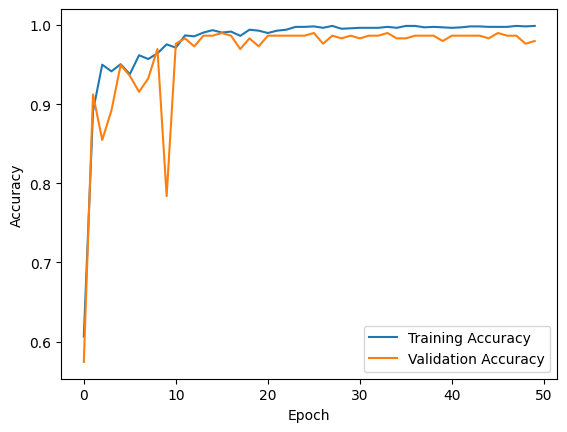

In [59]:
model.load_weights('best_model.h5')
print(y_test)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
print(y_test)
# Evaluate the model on the testing set
test_loss, test_acc,test_auc,test_prec,test_rec,tp,tn,fp,fn,cc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

11/11 [==============================] - 0s 14ms/step
[[166   1]
 [  8 173]]


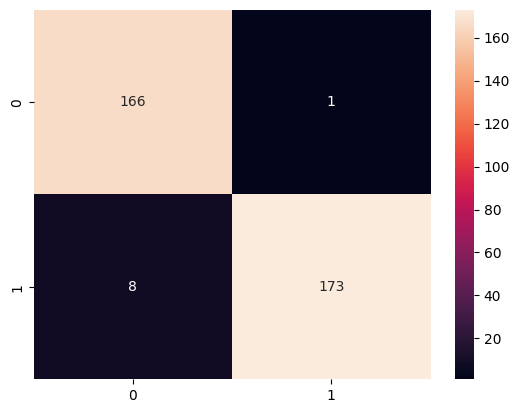

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [61]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9741379310344828


In [62]:
l= [0.9798850574712644,0.985632183908046,0.9813218390804598,0.9827586206896551,0.978448275862069]
s= [0.985632183908046,0.9899425287356322,0.9985632183908046,0.9971264367816092,0.992816091954023]
k= [0.9885057471264368,0.9913793103448276,0.9885057471264368,0.9885057471264368,0.9913793103448276]


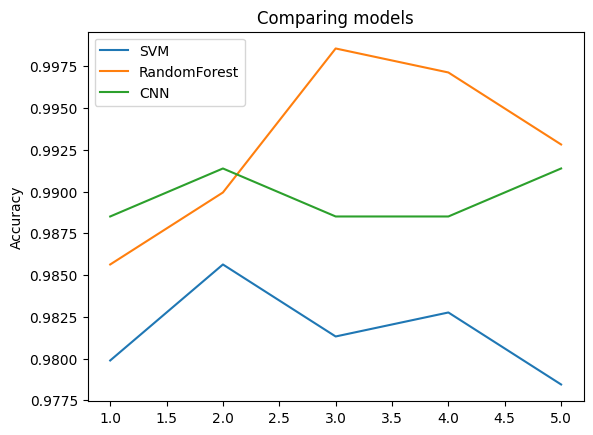

In [63]:
import matplotlib.pyplot as plt

a = [1, 2, 3, 4, 5]


plt.plot(a, l,label="SVM")
plt.plot(a, s,label="RandomForest")
plt.plot(a, k,label="CNN")

plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Comparing models')
plt.legend()
plt.show()